1.Import Library and Load the Dataset

In [1]:

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset (1).csv")

# View data
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [2]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


2.Data Cleaning


In [3]:
df.isnull().sum()


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)


In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [23]:
df['Profit_Margin'] = df['Profit'] / df['Sales']


In [24]:
df['Discount_Impact'] = df['Sales'] * df['Discount']


In [25]:
df_model = df_model.replace([np.inf, -np.inf], np.nan)
df_model = df_model.fillna(0)


3.Exploratory Data Analysis


1. Sales Over Time

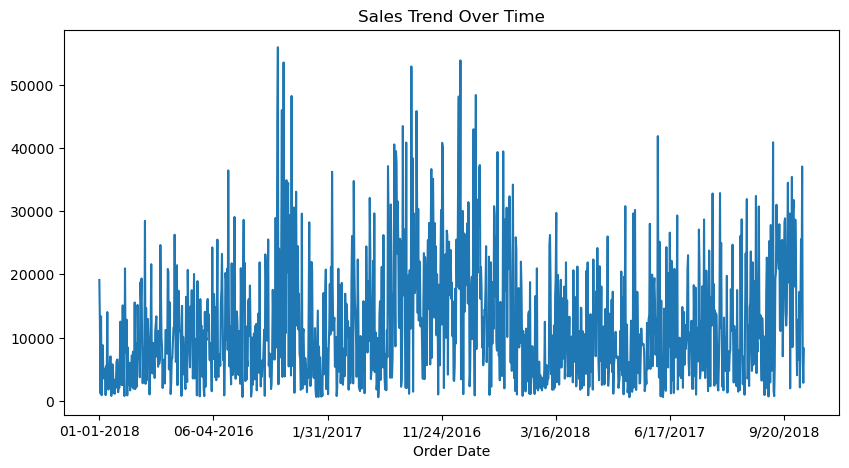

In [6]:
import matplotlib.pyplot as plt

df.groupby('Order Date')['Sales'].sum().plot(figsize=(10,5))
plt.title("Sales Trend Over Time")
plt.show()


2. Sales by Region

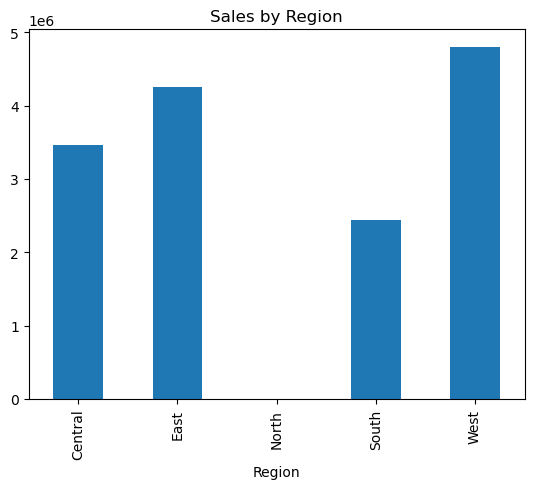

In [8]:
df.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title("Sales by Region")
plt.show()


3. Discount vs Profit

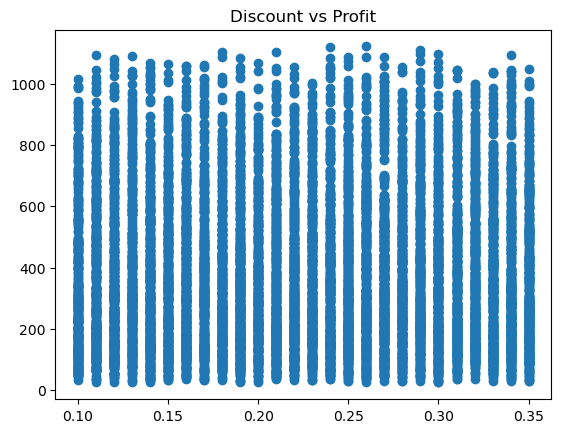

In [12]:
plt.scatter(df['Discount'], df['Profit'])
plt.title("Discount vs Profit")
plt.show()



4.Feature Engineering

In [15]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Weekday'] = df['Order Date'].dt.weekday
df['Quarter'] = df['Order Date'].dt.quarter


Business Features

In [26]:
df['Profit_Margin'] = df['Profit'] / df['Sales']
df['Discount_Impact'] = df['Sales'] * df['Discount']


5.Data Modeling

Remove unnecessary columns

In [17]:
df_model = df.drop(['Order ID', 'Customer Name', 'Order Date'], axis=1)


Encode categorical variables

In [18]:
df_model = pd.get_dummies(df_model, drop_first=True)


Define Features & Target

In [19]:
X = df_model.drop('Profit', axis=1)
y = df_model['Profit']


6.Model Building

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


1️ Linear Regression

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

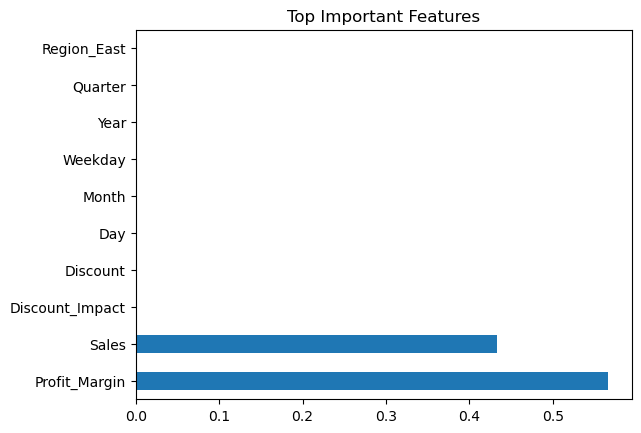

In [33]:
import pandas as pd

importance = rf.feature_importances_
features = X.columns

feat_imp = pd.Series(importance, index=features).sort_values(ascending=False)

feat_imp.head(10).plot(kind='barh')
plt.title("Top Important Features")
plt.show()


Save Model

In [34]:
import joblib

joblib.dump(rf, "profit_model.pkl")


['profit_model.pkl']

Power BI Integration

In [35]:
df_model['Predicted_Profit'] = rf.predict(X)
df_model.to_csv("Supermart_with_predictions.csv", index=False)
